In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [3]:
reviews = pd.read_csv('../rawdata/processed_reviews.csv')
summary = pd.read_csv('../rawdata/processed_summary.csv')

In [4]:
print(reviews.columns)
print(summary.columns)

Index(['rating', 'title_x', 'text', 'asin', 'timestamp', 'helpful_vote',
       'title_y', 'features', 'price', 'sentiment_title', 'sentiment_text',
       'combined_sentiment'],
      dtype='object')
Index(['asin', 'avg_rating', 'num_reviews', 'price', 'title_y', 'features',
       'os', 'color', 'total_negative', 'total_positive',
       'value_for_money_score', 'sentiment_ratio_positive',
       'first_review_date', 'last_review_date', 'review_period_hours',
       'review_frequency'],
      dtype='object')


In [5]:
# Convert the timestamp column to datetime format
reviews['timestamp'] = pd.to_datetime(reviews['timestamp'])

In [6]:
reviews.head()

,rating,title_x,text,asin,timestamp,helpful_vote,title_y,features,price,sentiment_title,sentiment_text,combined_sentiment
0,5,Fast!,I have been using laptops for the past 30 year...,B089HR6CQP,1970-01-01 00:26:41.470,0,"FusionTech Gaming G3 15 3500, 15.6 inch FHD La...",[15.6 inch FHD (1920 x 1080) 120Hz 250 nits WV...,799.0,1,1.0,2.0
1,5,Works Great - No Problems - Great Value for Price,"I read a bunch of negative reviews, so I wante...",B089HR6CQP,1970-01-01 00:27:06.710,0,"FusionTech Gaming G3 15 3500, 15.6 inch FHD La...",[15.6 inch FHD (1920 x 1080) 120Hz 250 nits WV...,799.0,1,1.0,2.0
2,5,Excellent gaming computer for the price,"Runs smooth, fast, and works well for gaming. ...",B089HR6CQP,1970-01-01 00:26:54.820,0,"FusionTech Gaming G3 15 3500, 15.6 inch FHD La...",[15.6 inch FHD (1920 x 1080) 120Hz 250 nits WV...,799.0,1,1.0,2.0
3,1,Overheating on setup,I'm impressed. I've never seen a computer so w...,B089HR6CQP,1970-01-01 00:27:06.820,0,"FusionTech Gaming G3 15 3500, 15.6 inch FHD La...",[15.6 inch FHD (1920 x 1080) 120Hz 250 nits WV...,799.0,-1,-1.0,-2.0
4,1,Don’t buy,"I bought 2 of these laptops, asked for replace...",B089HR6CQP,1970-01-01 00:26:51.410,22,"FusionTech Gaming G3 15 3500, 15.6 inch FHD La...",[15.6 inch FHD (1920 x 1080) 120Hz 250 nits WV...,799.0,-1,-1.0,-2.0


In [7]:
summary.head()

,asin,avg_rating,num_reviews,price,title_y,features,os,color,total_negative,total_positive,value_for_money_score,sentiment_ratio_positive,first_review_date,last_review_date,review_period_hours,review_frequency
0,B004PANKIA,5.000000,1,NaN,FusionTech ABC 15 Laptop - High-Octane Enterta...,"[Genuine Windows 7 Home Premium, 64bit, Intel ...",Windows 7;,Silver,0,1,NaN,1.000000,1970-01-01 00:21:46.520,1970-01-01 00:21:46.520,0.000000,inf
1,B0052F35I2,3.750000,12,NaN,"FusionTech ABC 17 Laptop, i7-2630QM, 8GB DDR3 ...","[Intel Core i7 Processor 2GHz, 6GB DDR3 RAM, 6...",Windows 7,NaN,3,9,NaN,0.750000,1970-01-01 00:22:02.840,1970-01-01 00:24:03.560,0.033533,357.852883
2,B0057CAGUA,5.000000,1,NaN,FusionTech Worktop 17R i17R Core i5-2430M 2.4G...,[],Microsoft Windows 7 Home Premium (64 bit),Red,0,0,NaN,0.000000,1970-01-01 00:21:54.370,1970-01-01 00:21:54.370,0.000000,inf
3,B005SDDXF8,4.333333,6,NaN,"FusionTech ABC 15 L502X Intel Core i5-2410, 2....",[2nd generation Intel Core i5-2 410M processor...,Windows 7 Home Premium (64-bit),NaN,2,4,NaN,0.666667,1970-01-01 00:22:21.850,1970-01-01 00:23:51.040,0.024775,242.179617
4,B0081YPX3Q,2.642857,14,NaN,FusionTech ABC15-9375sLV 15-Inch Laptop (2.1 G...,"[Intel Core i7 3612QM Processor 2.1GHz, 8 GB D...",Windows 7,Silver,7,4,NaN,0.285714,1970-01-01 00:22:25.330,1970-01-01 00:24:07.950,0.028506,491.132333


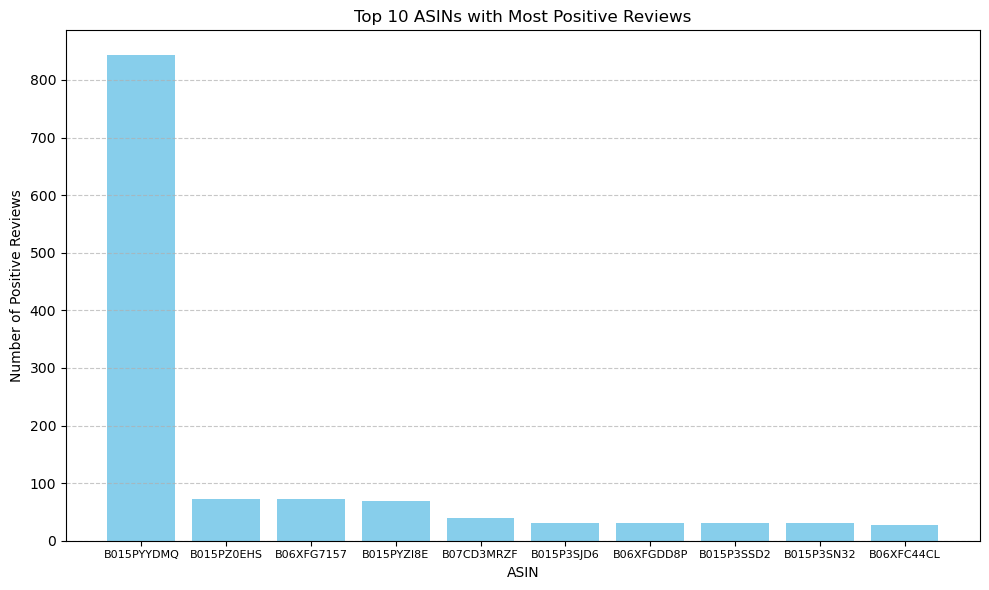

In [8]:
# Sort by total_positive and select the top 10 ASINs
top_asins = summary.sort_values(by='total_positive', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_asins['asin'], top_asins['total_positive'], color='skyblue')
plt.title('Top 10 ASINs with Most Positive Reviews')
plt.xlabel('ASIN')
plt.ylabel('Number of Positive Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Reduce font size of x-axis labels
plt.xticks(fontsize=8)  # Adjust fontsize here

plt.tight_layout()
plt.show()

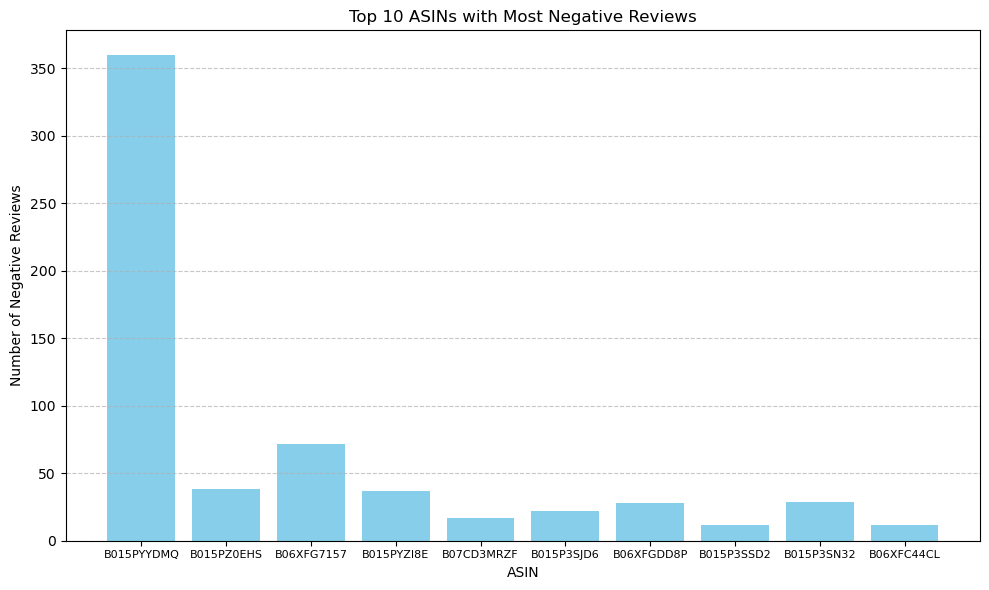

In [9]:
# Sort by total_positive and select the top 10 ASINs
bottom_asins = summary.sort_values(by='total_negative', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_asins['asin'], top_asins['total_negative'], color='skyblue')
plt.title('Top 10 ASINs with Most Negative Reviews')
plt.xlabel('ASIN')
plt.ylabel('Number of Negative Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Reduce font size of x-axis labels
plt.xticks(fontsize=8)  # Adjust fontsize here

plt.tight_layout()
plt.show()

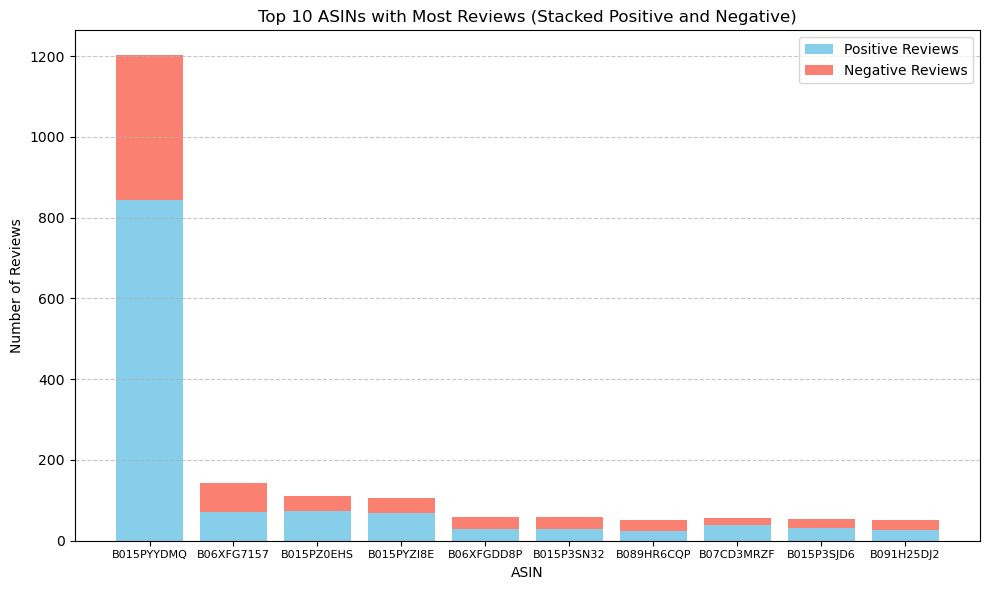

In [10]:
# Sort by total_reviews and select the top 10 ASINs
top_asins = summary.sort_values(by='num_reviews', ascending=False).head(10)

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_asins['asin'], top_asins['total_positive'], label='Positive Reviews', color='skyblue')
plt.bar(top_asins['asin'], top_asins['total_negative'], bottom=top_asins['total_positive'], label='Negative Reviews', color='salmon')

plt.title('Top 10 ASINs with Most Reviews (Stacked Positive and Negative)')
plt.xlabel('ASIN')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Reduce font size of x-axis labels
plt.xticks(fontsize=8)  # Adjust fontsize here

plt.tight_layout()
plt.show()